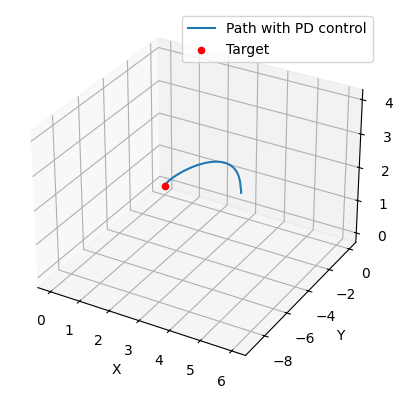

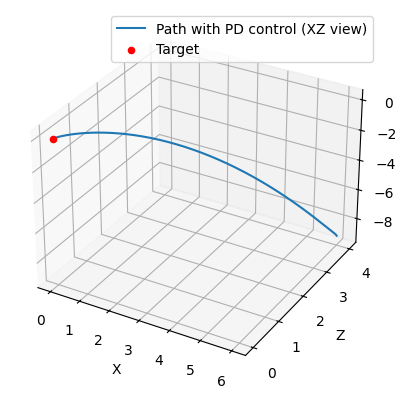

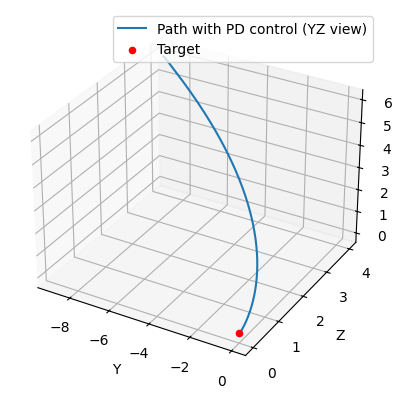

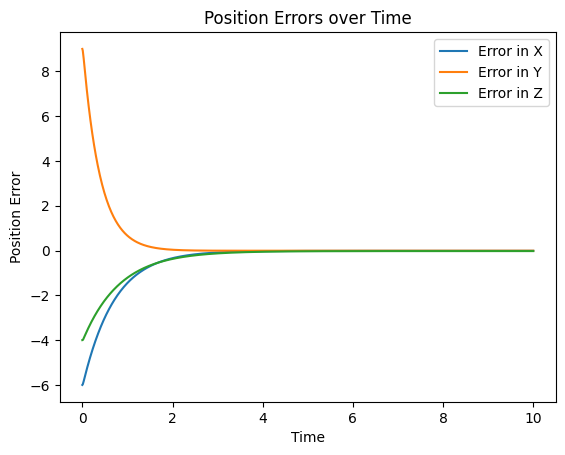

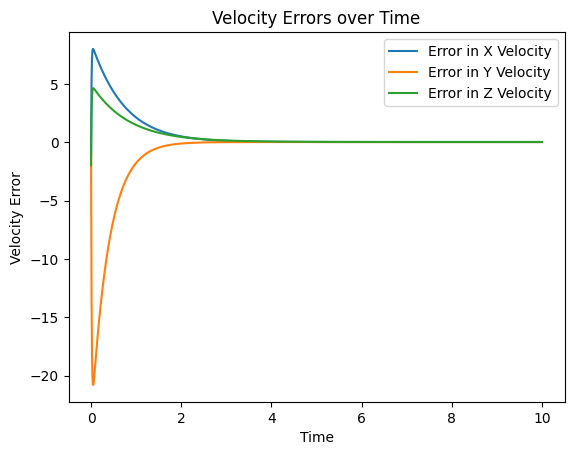

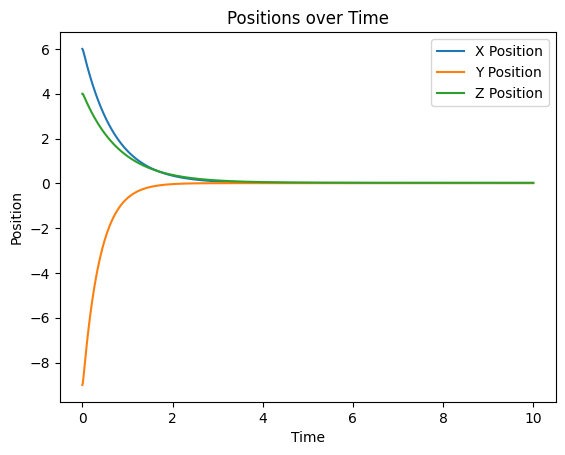

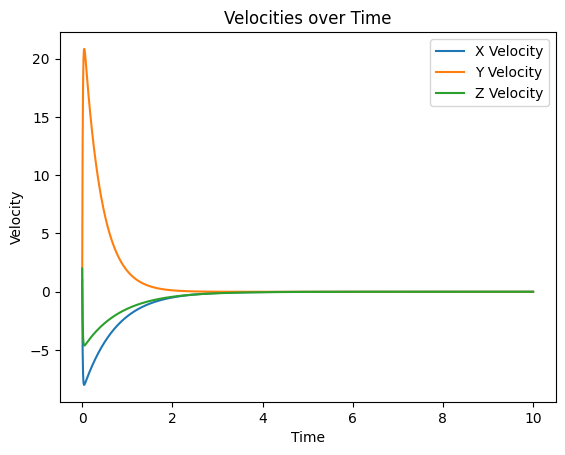

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# نرخ میانگین حرکت زاویه‌ای (فرض می‌کنیم n = 1 برای سادگی)
n = 1.0

# هدف (هدف، موقعیت و سرعت)
target_position = np.array([0, 0, 0])
target_velocity = np.array([0.02, 0.02, 0.03])  # فرض می‌کنیم هدف ثابت است

# پارامترهای کنترل PD
Kp = np.array([150, 200, 120])  # ضرایب کنترل تناسبی
Kd = np.array([100, 80, 100])  # ضرایب کنترل مشتق

# تعریف کنترل نیروها
def pd_control(state, target_state):
    x, y, z, x_dot, y_dot, z_dot = state
    target_x, target_y, target_z, target_x_dot, target_y_dot, target_z_dot = target_state
    error = np.array([target_x - x, target_y - y, target_z - z])
    error_dot = np.array([target_x_dot - x_dot, target_y_dot - y_dot, target_z_dot - z_dot])
    Ux = Kp[0] * error[0] + Kd[0] * error_dot[0]
    Uy = Kp[1] * error[1] + Kd[1] * error_dot[1]
    Uz = Kp[2] * error[2] + Kd[2] * error_dot[2]
    return Ux, Uy, Uz

# تابع تعریف معادلات CW با کنترل PD
def cw_equations_with_pd_control(state, t, target_state):
    x, y, z, x_dot, y_dot, z_dot = state
    Ux, Uy, Uz = pd_control(state, target_state)
    x_ddot = 3 * n**2 * x + 2 * n * y_dot + Ux
    y_ddot = -2 * n * x_dot + Uy
    z_ddot = -n**2 * z + Uz
    return [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]

# شرایط اولیه
x0 = 6
y0 = -9
z0 = 4
x_dot0 = 1
y_dot0 = 1
z_dot0 = 2

initial_state = [x0, y0, z0, x_dot0, y_dot0, z_dot0]

# وضعیت هدف
target_state = np.concatenate((target_position, target_velocity))

# بازه زمانی شبیه‌سازی
t = np.linspace(0, 10, 1000)

# حل معادلات CW با کنترل PD
solution = odeint(cw_equations_with_pd_control, initial_state, t, args=(target_state,))

# استخراج نتایج
x, y, z = solution[:, 0], solution[:, 1], solution[:, 2]
x_dot, y_dot, z_dot = solution[:, 3], solution[:, 4], solution[:, 5]

# محاسبه خطاها
error_x = target_position[0] - x
error_y = target_position[1] - y
error_z = target_position[2] - z

error_vx = target_velocity[0] - x_dot
error_vy = target_velocity[1] - y_dot
error_vz = target_velocity[2] - z_dot

# ترسیم مسیر سه‌بعدی
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(x, y, z, label='Path with PD control')
ax1.scatter(*target_position, color='r', label='Target', zorder=5)  # ترسیم هدف
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()

# نمای XZ
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot(x, z, y, label='Path with PD control (XZ view)')
ax2.scatter(target_position[0], target_position[2], target_position[1], color='r', label='Target', zorder=5)
ax2.set_xlabel('X')
ax2.set_ylabel('Z')
ax2.set_zlabel('Y')
ax2.legend()

# نمای YZ
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot(y, z, x, label='Path with PD control (YZ view)')
ax3.scatter(target_position[1], target_position[2], target_position[0], color='r', label='Target', zorder=5)
ax3.set_xlabel('Y')
ax3.set_ylabel('Z')
ax3.set_zlabel('X')
ax3.legend()

# ترسیم خطاهای موقعیت
fig4 = plt.figure()
plt.plot(t, error_x, label='Error in X')
plt.plot(t, error_y, label='Error in Y')
plt.plot(t, error_z, label='Error in Z')
plt.xlabel('Time')
plt.ylabel('Position Error')
plt.legend()
plt.title('Position Errors over Time')

# ترسیم خطاهای سرعت
fig5 = plt.figure()
plt.plot(t, error_vx, label='Error in X Velocity')
plt.plot(t, error_vy, label='Error in Y Velocity')
plt.plot(t, error_vz, label='Error in Z Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity Error')
plt.legend()
plt.title('Velocity Errors over Time')

# ترسیم موقعیت‌ها
fig6 = plt.figure()
plt.plot(t, x, label='X Position')
plt.plot(t, y, label='Y Position')
plt.plot(t, z, label='Z Position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title('Positions over Time')

# ترسیم سرعت‌ها
fig7 = plt.figure()
plt.plot(t, x_dot, label='X Velocity')
plt.plot(t, y_dot, label='Y Velocity')
plt.plot(t, z_dot, label='Z Velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend()
plt.title('Velocities over Time')

plt.show()
